<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-1/vitalfew-DT-RF-GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [51]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### **데이터 구성하기**

In [3]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx',
                       sheet_name = 'AIR_POLLUTION')

print(df_raw.shape)
df_raw.head(10)

(366, 15)


,MeasDate,PM10,PM25,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,20.0,0.054,0.021,0.5,0.003,24.034783,0.00,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,19.0,0.053,0.020,0.5,0.003,24.287500,0.00,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,20.0,0.042,0.023,0.4,0.003,24.175000,0.00,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,17.0,0.034,0.026,0.4,0.003,25.354167,0.00,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,19.0,0.045,0.035,0.5,0.003,27.295833,0.00,1.454167,175.416667,45.541667,993.537500,0.0,3.916667
5,2019-07-06,29.0,21.0,0.043,0.032,0.5,0.003,29.866667,0.00,1.541667,80.000000,39.708333,993.691667,0.0,3.500000
6,2019-07-07,16.0,12.0,0.043,0.014,0.3,0.002,26.858333,0.00,2.266667,82.916667,43.541667,997.450000,0.0,6.583333
7,2019-07-08,10.0,6.0,0.035,0.019,0.3,0.002,25.125000,0.00,1.962500,75.833333,45.333333,997.941667,0.0,6.583333
8,2019-07-09,10.0,6.0,0.033,0.019,0.4,0.002,25.112500,0.00,1.837500,81.250000,46.250000,996.712500,0.0,4.416667
9,2019-07-10,9.0,6.0,0.027,0.019,0.3,0.002,22.787500,0.82,2.125000,80.000000,61.000000,997.329167,0.0,8.291667


In [4]:
df_raw.drop('PM25', axis = 1, inplace = True)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    float64       
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 40.2 KB


In [6]:
df_raw.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,311.000,365.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000
mean,33.422,0.024,0.027,0.517,0.003,13.863,0.382,2.225,209.420,60.292,1005.846,0.023,5.063
std,15.938,0.012,0.010,0.153,0.001,9.830,1.122,0.723,70.753,14.533,8.125,0.222,2.986
min,5.000,0.002,0.008,0.300,0.002,-7.954,0.000,0.942,50.000,17.875,983.800,0.000,0.000
25%,22.000,0.014,0.019,0.400,0.003,5.493,0.000,1.722,160.000,49.677,999.423,0.000,2.510
50%,31.000,0.023,0.025,0.500,0.003,13.996,0.000,2.094,221.042,61.062,1006.408,0.000,5.312
75%,42.000,0.032,0.034,0.600,0.003,23.073,0.115,2.620,265.833,69.917,1011.571,0.000,7.573
max,101.000,0.062,0.059,1.000,0.005,31.721,11.800,5.883,351.250,94.958,1025.529,3.188,10.000


**결측값 확인하기**

In [7]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [8]:
df_raw.fillna(df_raw.median(), inplace = True)

df_raw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [9]:
df_raw.isnull().sum()

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

**데이터 분할하기**

In [10]:
df_raw_x = df_raw.drop(['MeasDate', 'PM10'], axis = 1, inplace = False)
df_raw_y = df_raw['PM10']

In [11]:
print(df_raw_x.shape)
df_raw_x.head()

(366, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [12]:
print(df_raw_y.shape)
df_raw_y.head()

(366,)


0    29.0
1    26.0
2    30.0
3    28.0
4    29.0
Name: PM10, dtype: float64

In [30]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                                df_raw_y,
                                                                test_size = 0.3)

print('Shape of df_train_x : {}'.format(df_train_x.shape))
print('Shape of df_test_x : {}'.format(df_test_x.shape))
print('Shape of df_train_y : {}'.format(df_train_y.shape))
print('Shape of df_test_y : {}'.format(df_test_y.shape))

Shape of df_train_x : (256, 12)
Shape of df_test_x : (110, 12)
Shape of df_train_y : (256,)
Shape of df_test_y : (110,)


In [38]:
print(df_train_x.shape)
df_train_x.head()

(256, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
117,0.021,0.018,0.4,0.002,10.408333,0.000000,2.708333,294.583333,60.583333,1008.400000,0.0,4.041667
222,0.029,0.013,0.5,0.003,0.141667,0.000000,3.008333,300.833333,50.166667,1016.575000,0.0,3.166667
59,0.032,0.033,0.5,0.003,23.587500,6.150000,2.141667,126.666667,77.625000,995.941667,0.0,5.916667
137,0.003,0.046,0.7,0.003,5.300000,2.685714,2.058333,76.250000,82.500000,1008.008333,0.0,9.083333
333,0.035,0.024,0.4,0.003,20.537500,0.000000,1.975000,257.916667,65.416667,1004.495833,0.0,1.333333


In [39]:
print(df_train_y.shape)
df_train_y.head()

(256,)


117    21.0
222    39.0
59     27.0
137    23.0
333    31.0
Name: PM10, dtype: float64

In [40]:
print(df_test_x.shape)
df_test_x.head()

(110, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
176,0.006,0.045,1.0,0.003,0.870833,0.000000,1.262500,105.000000,68.375000,1016.529167,0.0,0.416667
0,0.054,0.021,0.5,0.003,24.034783,0.000000,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
153,0.009,0.039,0.7,0.003,4.895833,0.471429,1.554167,152.916667,76.666667,1011.954167,0.0,9.875000
255,0.020,0.029,0.5,0.003,6.316667,0.000000,2.620833,169.583333,49.291667,1010.966667,0.0,3.708333
228,0.011,0.043,0.9,0.003,7.987500,0.000000,1.204167,210.416667,70.750000,1010.225000,0.0,3.416667


In [41]:
print(df_test_y.shape)
df_test_y.head()

(110,)


176    72.0
0      29.0
153    36.0
255    31.0
228    81.0
Name: PM10, dtype: float64

### **변수 중요도 확인하기**

In [55]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(df_train_x, df_train_y)

print('Model Score on train set : {:.3f}'.format(dt_regressor.score(df_train_x, df_train_y)))
print('Model Score on test set : {:.3f}'.format(dt_regressor.score(df_test_x, df_test_y)))

Model Score on train set : 1.000
Model Score on test set : -0.176


In [61]:
dt_importance = pd.DataFrame()
dt_importance['Feature'] = df_train_x.columns
dt_importance['Importance'] = dt_regressor.feature_importances_

dt_importance.sort_values('Importance', ascending = False, inplace = True)
dt_importance.round(3).head()

,Feature,Importance
2,CO,0.334
4,TEMP,0.121
0,O3,0.117
11,CLOUD,0.093
9,ATM_PRESS,0.076


기본 의사결정나무는 train과 test 데이터에 대해 각각 100%, 7.8%의 성능을 보여주고 있다. Train 데이터에 있어서 매우 과대적합인 것으로 확인된다. 모델의 성능이 매우 좋지 않은 것으로 판단된다.

In [54]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(df_train_x, df_train_y)

print('Model Score on train set : {:.3f}'.format(rf_regressor.score(df_train_x, df_train_y)))
print('Model Score on test set : {:.3f}'.format(rf_regressor.score(df_test_x, df_test_y)))

Model Score on train set : 0.923
Model Score on test set : 0.547


In [60]:
rf_importance = pd.DataFrame()
rf_importance['Feature'] = df_train_x.columns
rf_importance['Importance'] = rf_regressor.feature_importances_

rf_importance.sort_values('Importance', ascending = False, inplace = True)
rf_importance.round(3).head()

,Feature,Importance
2,CO,0.303
4,TEMP,0.121
0,O3,0.115
11,CLOUD,0.085
1,NO2,0.081


In [53]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(df_train_x, df_train_y)

print('Model Score on train set : {:.3f}'.format(gb_regressor.score(df_train_x, df_train_y)))
print('Model Score on test set : {:.3f}'.format(gb_regressor.score(df_test_x, df_test_y)))

Model Score on train set : 0.929
Model Score on test set : 0.463


In [59]:
gb_importance = pd.DataFrame()
gb_importance['Feature'] = df_train_x.columns
gb_importance['Importance'] = gb_regressor.feature_importances_

gb_importance.sort_values('Importance', ascending = False, inplace = True)
gb_importance.round(3).head()

,Feature,Importance
2,CO,0.330
4,TEMP,0.148
0,O3,0.130
7,WIND_DIR,0.092
1,NO2,0.081


In [13]:
# scaler = StandardScaler()
# df_scaled_raw_x = scaler.fit_transform(df_raw_x)

# print(df_scaled_raw_x.shape)
# df_scaled_raw_x

(366, 12)


array([[ 2.56261587, -0.56709216, -0.10286532, ..., -1.32764173,
        -0.10386594,  0.2120853 ],
       [ 2.47832384, -0.6647195 , -0.10286532, ..., -0.89306892,
        -0.10386594, -0.4124164 ],
       [ 1.55111152, -0.37183748, -0.81321825, ..., -0.93363709,
        -0.10386594,  0.41195014],
       ...,
       [ 1.71969558, -1.73862028, -0.81321825, ..., -1.37526522,
        -0.10386594, -0.81761352],
       [ 0.20243905,  0.11629924,  0.60748762, ..., -1.6012145 ,
        -0.10386594,  0.84509189],
       [ 1.29823543, -1.73862028, -1.52357118, ..., -2.71709582,
        -0.10386594,  1.65548612]])

**O3, NO2, CO, SO2의 분포 확인하기**

Text(0.5, 0, 'SO2')

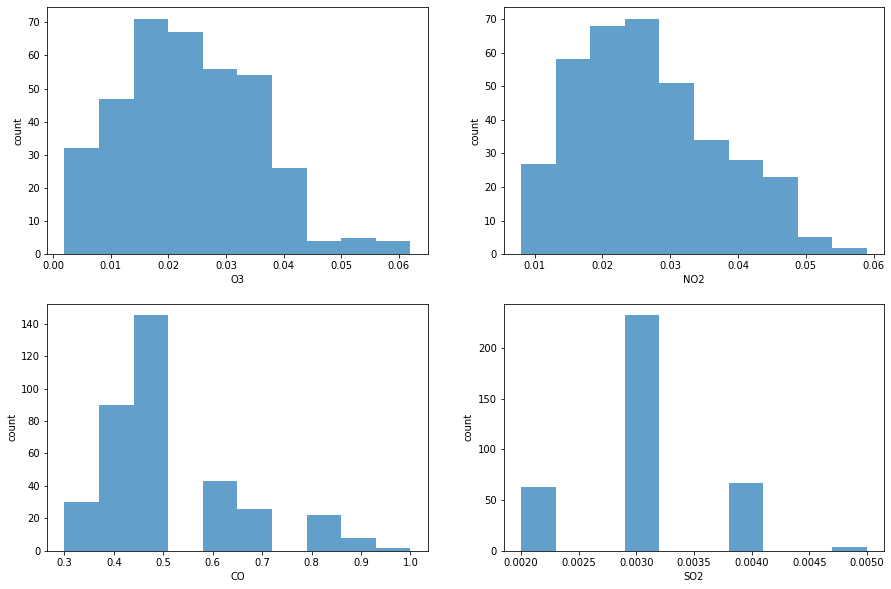

In [17]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))

axes[0,0].hist(df_raw_x['O3'], label = 'O3', alpha = 0.7)
axes[0,0].set_ylabel('count')
axes[0,0].set_xlabel('O3')

axes[0,1].hist(df_raw_x['NO2'], label = 'NO2', alpha = 0.7)
axes[0,1].set_ylabel('count')
axes[0,1].set_xlabel('NO2')

axes[1,0].hist(df_raw_x['CO'], label = 'CO', alpha = 0.7)
axes[1,0].set_ylabel('count')
axes[1,0].set_xlabel('CO')

axes[1,1].hist(df_raw_x['SO2'], label = 'SO2', alpha = 0.7)
axes[1,1].set_ylabel('count')
axes[1,1].set_xlabel('SO2')

- O3의 분포가 

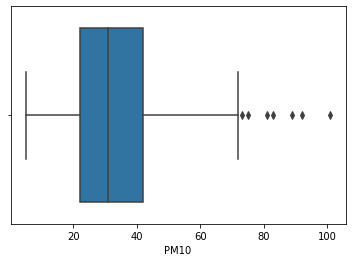

In [22]:
sns.boxplot(x = df_raw_y)

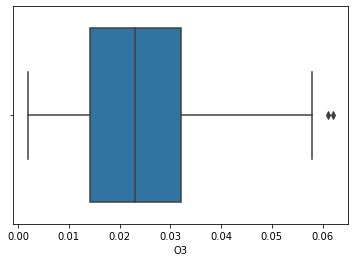

In [26]:
sns.boxplot(x = , data = df_raw_x)